## Machine Learning App 1: Fetal Health Prediction

# Random Forest

#### Install Libraries

In [96]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import pickle

# Package to implement Random Forest
import sklearn
from sklearn.ensemble import RandomForestClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [97]:
!pip install streamlit

#### Import Data

In [98]:
# Import Data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [99]:
# Dropping null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### Prepare Data

In [100]:
# Selecting data correponding to Input Features X and Outcome y
X = df.drop('fetal_health', axis=1)

# Output column for prediction
y = df['fetal_health'] 

# One-hot encoding to handle categorical variables
X = pd.get_dummies(X)

# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


#### Hyperparameter Tuning

In [101]:
# Define your model
classifier = RandomForestClassifier(random_state = 42)

In [102]:
# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [103]:
# Creating folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

In [104]:
# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = classifier,
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs

In [105]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Training time: 31.659250259399414s


In [106]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.8429128498822425
Initial parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10}


In [107]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [11, 12, 13],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [180, 200, 220]
}

pprint(param_grid)

{'max_depth': [11, 12, 13],
 'min_samples_leaf': [2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [180, 200, 220]}


In [108]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier,
                        param_grid = param_grid,
                        scoring= 'f1_macro',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

In [109]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Training time: 28.77745246887207s


In [110]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.8635434062189081
Improved parameters:  {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


#### Confusion Matrix

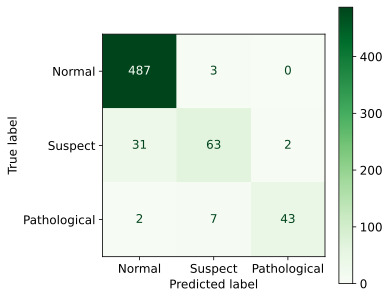

In [111]:
class_names = ['Normal', 'Suspect', 'Pathological']

# Predictions on test set
y_pred = model_cv.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = model_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Greens', ax = ax);

# Saving Confusion Matrix
fig.savefig("rf_confusion_mat.svg", bbox_inches = 'tight')

#### Classification Report

In [112]:
class_names = ['Normal', 'Suspect', 'Pathological']

# Generating Classification Report
report_df = pd.DataFrame(classification_report(test_y, y_pred, target_names=class_names, output_dict=True)).transpose()

# Save the report as a CSV File
report_df.to_csv('rf_class_report.csv') 
report_df

,precision,recall,f1-score,support
Normal,0.936538,0.993878,0.964356,490.000000
Suspect,0.863014,0.656250,0.745562,96.000000
Pathological,0.955556,0.826923,0.886598,52.000000
accuracy,0.929467,0.929467,0.929467,0.929467
macro avg,0.918369,0.825684,0.865506,638.000000
weighted avg,0.927025,0.929467,0.925097,638.000000


#### Feature Importance Plot

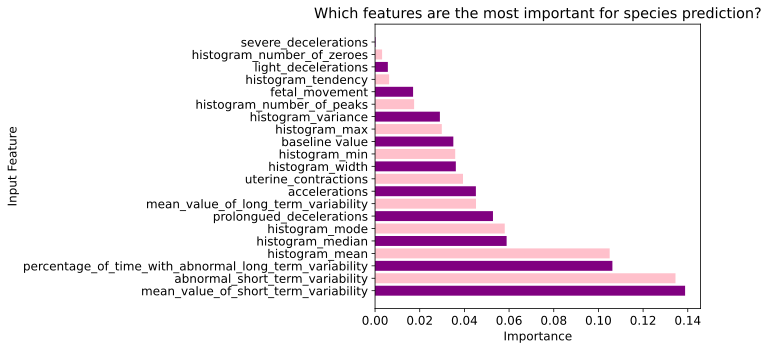

In [113]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("rf_feature_imp.svg")

#### Prediction Probabilities

In [114]:
# Getting prediction probabilities
prob = model_cv.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for each price range's probability
fetal_health_columns = ['Normal (1.0)', 'Suspect (2.0)', 'Pathological (3.0)']
prob_df = pd.DataFrame(prob, columns=fetal_health_columns, index=result.index)

# Concatenating the result with probabilities
result = pd.concat([result, prob_df], axis=1)

# Display the result
display(result.head(10))

# Saving the dataframe as a CSV file
result.to_csv('rf_Prediction_Results.csv', index=False)


,Actual,Predicted,Normal (1.0),Suspect (2.0),Pathological (3.0)
669,1.0,1.0,0.822898,0.166556,0.010546
1205,2.0,2.0,0.336224,0.635253,0.028523
870,1.0,1.0,0.974262,0.025738,0.000000
547,2.0,1.0,0.556107,0.430224,0.013668
1806,1.0,1.0,0.743056,0.227623,0.029321
1195,1.0,1.0,0.999538,0.000358,0.000104
2068,1.0,1.0,0.988706,0.011113,0.000181
87,1.0,1.0,0.917763,0.082064,0.000173
577,1.0,1.0,0.886901,0.081413,0.031686
1260,1.0,1.0,0.997391,0.001904,0.000705


### Pickle Random Forest

In [115]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_fetal_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(model_cv, rf_pickle) 

# Close the file
rf_pickle.close() 

# Decision Tree

In [116]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [117]:
# Load dataset as dataframe
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [118]:
# Distribution of Species column
df['fetal_health'].value_counts(normalize = True)

fetal_health
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: proportion, dtype: float64

In [119]:
# Output column for prediction
output = df['fetal_health']

# Input features (excluding price range column)
features = df.drop('fetal_health', axis=1)

# One-hot encoding to handle categorical variables
features_encoded = pd.get_dummies(features)

features_encoded.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [120]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

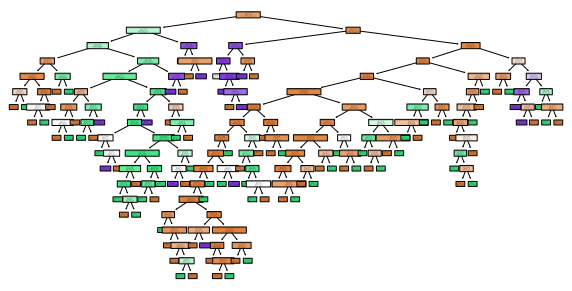

In [121]:
# Visualizing trained decision tree model
fig = plt.figure(figsize = (10,5))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = ['Normal', 'Suspect', 'Pathological'],
                   filled = True)

# Saving Decision Tree
fig.savefig("dt_visual.svg", bbox_inches = 'tight')

### Confusion Matrix

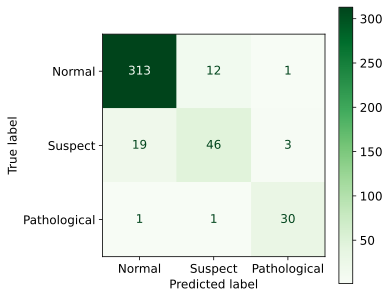

In [122]:
class_names = ['Normal', 'Suspect', 'Pathological']

# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Greens', ax = ax);

# Saving Confusion Matrix
fig.savefig("dt_confusion_mat.svg", bbox_inches = 'tight')

### Classification Report

In [123]:
class_names = ['Normal', 'Suspect', 'Pathological']

# Predictions on test set
report_df = pd.DataFrame(classification_report(test_y, y_pred, target_names=class_names, output_dict=True)).transpose()

# Save the report as a CSV File
report_df.to_csv('dt_class_report.csv') 
report_df

,precision,recall,f1-score,support
Normal,0.939940,0.960123,0.949924,326.000000
Suspect,0.779661,0.676471,0.724409,68.000000
Pathological,0.882353,0.937500,0.909091,32.000000
accuracy,0.913146,0.913146,0.913146,0.913146
macro avg,0.867318,0.858031,0.861141,426.000000
weighted avg,0.910030,0.913146,0.910859,426.000000


### Feature Importance

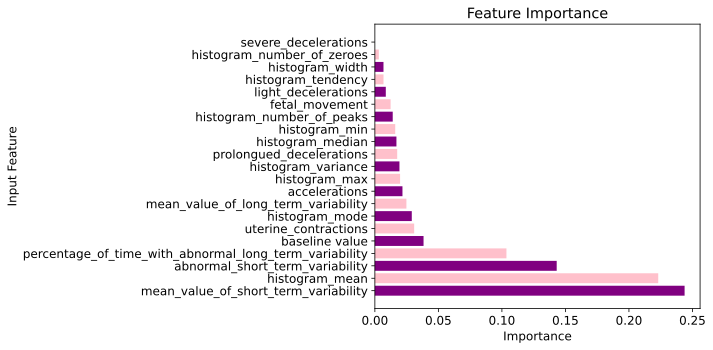

In [124]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Feature Importance') 
plt.tight_layout()
plt.savefig("dt_feature_imp.svg");

### Prediction Probabilities

In [125]:
# Getting prediction probabilities
prob = clf.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for each price range's probability
fetal_health_columns = ['Normal (1.0)', 'Suspect (2.0)', 'Pathological (3.0)']
prob_df = pd.DataFrame(prob, columns=fetal_health_columns, index=result.index)

# Concatenating the result with probabilities
result = pd.concat([result, prob_df], axis=1)

# Display the result
display(result.head(10))

# Saving the dataframe as a CSV file
result.to_csv('dt_Prediction_Results.csv', index=False)

,Actual,Predicted,Normal (1.0),Suspect (2.0),Pathological (3.0)
669,1.0,1.0,1.0,0.0,0.0
1205,2.0,2.0,0.0,1.0,0.0
870,1.0,1.0,1.0,0.0,0.0
547,2.0,1.0,1.0,0.0,0.0
1806,1.0,2.0,0.0,1.0,0.0
1195,1.0,1.0,1.0,0.0,0.0
2068,1.0,1.0,1.0,0.0,0.0
87,1.0,1.0,1.0,0.0,0.0
577,1.0,1.0,1.0,0.0,0.0
1260,1.0,1.0,1.0,0.0,0.0


### Pickle Decision Tree

In [126]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_fetal_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 

# AdaBoost

In [127]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement AdaBoost
import sklearn
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [128]:
# Import Data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [129]:
# df.dropna(inplace = True)
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [130]:
# Statistical Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [131]:
# Selecting data correponding to Input Features X and Outcome y
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

X = pd.get_dummies(X)

# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


## Implementing AdaBoost for Classification

In [132]:
# Define your model
classifier = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

In [133]:
# Start with an initial guess for parameters
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

pprint(random_grid)

{'learning_rate': [0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0,
                   1.1,
                   1.2000000000000002,
                   1.3000000000000003,
                   1.4000000000000001,
                   1.5000000000000002,
                   1.6,
                   1.7000000000000002,
                   1.8000000000000003,
                   1.9000000000000001,
                   2.0],
 'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500]}


In [134]:
# Creating stratified folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [135]:
# Call RandomizedSearchCV()
random_cv = RandomizedSearchCV(estimator = classifier,
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs

In [136]:
# Fit the model
start = time.time()            # Start Time
random_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training time: 47.74532890319824s


In [137]:
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)

Initial score:  0.8526924284027348
Initial parameters:  {'n_estimators': 335, 'learning_rate': 0.7000000000000001}


In [138]:
# Create the parameter grid based on the results of random search
param_grid = {'n_estimators': [400, 420, 440, 460, 480, 500],
              'learning_rate': [1.15, 1.20, 1.25]
}

pprint(param_grid)

{'learning_rate': [1.15, 1.2, 1.25],
 'n_estimators': [400, 420, 440, 460, 480, 500]}


In [139]:
# Call GridSearchCV()
grid_cv = GridSearchCV(estimator = classifier,
                        param_grid = param_grid,
                        scoring= 'f1_macro',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

In [140]:
# Fit the model
start = time.time()            # Start Time
grid_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training time: 18.658106088638306s


In [141]:
print('Improved score: ', grid_cv.best_score_)
print('Improved parameters: ', grid_cv.best_params_)

Improved score:  0.8466622910987139
Improved parameters:  {'learning_rate': 1.2, 'n_estimators': 420}


## Analyzing the performance of each stump in the ensemble

In [142]:
# Error of each stump
grid_cv.best_estimator_.estimator_errors_

array([0.17405914, 0.36931027, 0.35943906, 0.47677692, 0.42439691,
       0.4222534 , 0.42603902, 0.49383559, 0.4224052 , 0.45795534,
       0.50477028, 0.42648237, 0.48315005, 0.54326994, 0.47257392,
       0.45797874, 0.51351014, 0.48243043, 0.50904953, 0.53784248,
       0.49119899, 0.51744028, 0.54435231, 0.5642553 , 0.57308362,
       0.54958333, 0.51185883, 0.52119993, 0.56613508, 0.51005999,
       0.51301625, 0.55578544, 0.58201365, 0.58005753, 0.55483261,
       0.5851977 , 0.51246791, 0.53303999, 0.58338905, 0.55491301,
       0.58686596, 0.54488821, 0.53883754, 0.55534138, 0.50896977,
       0.56514716, 0.51697692, 0.51860425, 0.52629419, 0.53962676,
       0.54783001, 0.58235375, 0.6147175 , 0.60058916, 0.58958952,
       0.60839342, 0.58615685, 0.5764569 , 0.60109963, 0.54480887,
       0.55554376, 0.53941927, 0.53667944, 0.58695659, 0.56556745,
       0.56171852, 0.57147767, 0.57482007, 0.57310927, 0.57338607,
       0.61402511, 0.5926134 , 0.59933402, 0.60402847, 0.59404

In [143]:
# Stump Weightage
grid_cv.best_estimator_.estimator_weights_

array([2.70033027, 1.47398889, 1.52513616, 0.94332765, 1.1974757 ,
       1.20801232, 1.18941321, 0.86136729, 1.20726565, 1.0340687 ,
       0.80887857, 1.18723778, 0.91268701, 0.62356008, 0.96355406,
       1.03395555, 0.76691213, 0.91614527, 0.78833412, 0.6497847 ,
       0.87402583, 0.74802931, 0.61832448, 0.52163627, 0.47844446,
       0.59299183, 0.77484357, 0.7299559 , 0.51245727, 0.78348216,
       0.7692845 , 0.56288707, 0.43452247, 0.44416512, 0.56751729,
       0.41879936, 0.77191826, 0.67295325, 0.42773483, 0.56712667,
       0.41054741, 0.61573152, 0.64498017, 0.5650452 , 0.78871711,
       0.51728244, 0.75025607, 0.74243499, 0.70544796, 0.64116843,
       0.6014884 , 0.43284466, 0.27115342, 0.34227195, 0.39705411,
       0.30309977, 0.41405614, 0.46188226, 0.33971781, 0.61611543,
       0.56406167, 0.64217063, 0.65539847, 0.41009882, 0.51522998,
       0.53400919, 0.48631756, 0.46992308, 0.47831863, 0.47696086,
       0.2746604 , 0.38204105, 0.34854749, 0.3250418 , 0.37491

### Confusion Matrix

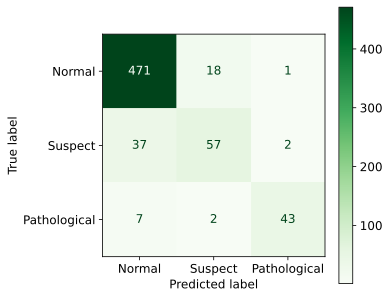

In [144]:
# Predictions on test set
class_names = ['Normal', 'Suspect', 'Pathological']

y_pred = grid_cv.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = grid_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Greens', ax = ax);

# Saving Confusion Matrix
fig.savefig("ada_confusion_mat.svg", bbox_inches = 'tight')

### Classification Report

In [145]:
class_names = ['Normal', 'Suspect', 'Pathological']

# Predictions on test set
y_pred = grid_cv.predict(test_X)

report_df = pd.DataFrame(classification_report(test_y, y_pred, target_names=class_names, output_dict=True)).transpose()

# Save the report as a CSV File
report_df.to_csv('ada_class_report.csv') 
report_df

,precision,recall,f1-score,support
Normal,0.914563,0.961224,0.937313,490.000000
Suspect,0.740260,0.593750,0.658960,96.000000
Pathological,0.934783,0.826923,0.877551,52.000000
accuracy,0.894984,0.894984,0.894984,0.894984
macro avg,0.863202,0.793966,0.824608,638.000000
weighted avg,0.889984,0.894984,0.890559,638.000000


### Prediction Probabilities

In [146]:
# Getting prediction probabilities
prob = grid_cv.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for each price range's probability
fetal_health_columns = ['Normal (1.0)', 'Suspect (2.0)', 'Pathological (3.0)']
prob_df = pd.DataFrame(prob, columns=fetal_health_columns, index=result.index)

# Concatenating the result with probabilities
result = pd.concat([result, prob_df], axis=1)

# Display the result
display(result.head(10))

# Saving the dataframe as a CSV file
result.to_csv('ada_fetal_health.csv', index=False)


,Actual,Predicted,Normal (1.0),Suspect (2.0),Pathological (3.0)
669,1.0,1.0,0.348016,0.344260,0.307724
1205,2.0,1.0,0.348919,0.339626,0.311455
870,1.0,1.0,0.365784,0.339956,0.294260
547,2.0,1.0,0.351927,0.338881,0.309193
1806,1.0,2.0,0.342057,0.344397,0.313545
1195,1.0,1.0,0.362653,0.339731,0.297616
2068,1.0,1.0,0.361683,0.338315,0.300002
87,1.0,2.0,0.344693,0.346874,0.308433
577,1.0,1.0,0.347244,0.340574,0.312182
1260,1.0,1.0,0.350563,0.332978,0.316459


### Feature Importance

In [147]:
# Storing importance values from the best fit model
importance = grid_cv.best_estimator_.feature_importances_

In [148]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

,Feature,Importance
0,abnormal_short_term_variability,0.169120
1,percentage_of_time_with_abnormal_long_term_var...,0.122541
2,histogram_mean,0.095296
3,histogram_median,0.081315
4,histogram_mode,0.071154
5,baseline value,0.070015
6,prolongued_decelerations,0.061348
7,mean_value_of_short_term_variability,0.052765
8,histogram_variance,0.035204
9,mean_value_of_long_term_variability,0.031240


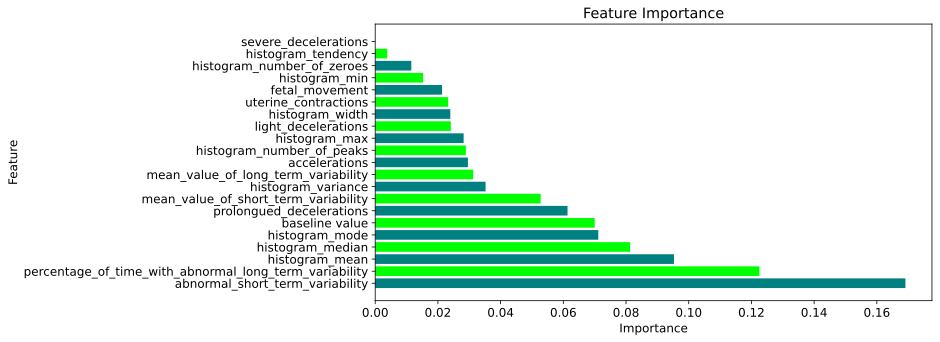

In [149]:
# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color =['teal','lime'])

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.savefig("ada_feature_imp.svg")

## Pickle AdaBoost

In [150]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
ada_pickle = open('adaboost_fetal_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(grid_cv, ada_pickle) 

# Close the file
ada_pickle.close() 

# Soft Voting

In [151]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Machine Learning Models
import sklearn
from sklearn.tree import DecisionTreeClassifier      # Algorithm 1
from sklearn.ensemble import RandomForestClassifier  # Algorithm 2
from sklearn.svm import SVC                          # Algorithm 3
from sklearn.ensemble import VotingClassifier
import pickle

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split

# Package for generating F1 Score
from sklearn.metrics import f1_score

from sklearn.linear_model import LinearRegression   # Algorithm 1
from sklearn.tree import DecisionTreeRegressor      # Algorithm 2
from sklearn.ensemble import RandomForestRegressor  # Algorithm 3
from sklearn.ensemble import VotingRegressor

# Package for computing R2 value
from sklearn.metrics import r2_score

%matplotlib inline

In [152]:
# Load dataset as dataframe
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [153]:
# Dropping null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [154]:
# Selecting data correponding to Input Features X and Outcome y
X = df.drop('fetal_health', axis=1)

# Output column for prediction
y = df['fetal_health'] 

# One-hot encoding to handle categorical variables
X = pd.get_dummies(X)

# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [155]:
# Models to use for soft voting
dt_clf = DecisionTreeClassifier(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(probability = True, random_state = 42) # Specfiy 'probability = True' for SVC while using soft voting

In [156]:
# Implement soft voting classifier on train data
soft_voting_clf = VotingClassifier(estimators = [('dt', dt_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              voting = 'soft', n_jobs = -1)
soft_voting_clf.fit(train_X, train_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 n_jobs=-1, voting='soft')

In [157]:
# Evaluate prediction performance on test data using F1 Score
for svc_clf in (dt_clf, rnd_clf, svm_clf, soft_voting_clf):
    svc_clf.fit(train_X, train_y)
    y_pred = svc_clf.predict(test_X)
    print(svc_clf.__class__.__name__, f1_score(test_y, y_pred, average = 'macro'))

DecisionTreeClassifier 0.8429865593176027
RandomForestClassifier 0.8701702903383576
SVC 0.667023802020966
VotingClassifier 0.8560318715668395


In [158]:
# Implement voting regressor on train data
voting_reg_weight = VotingClassifier(estimators = [('svc', svm_clf), ('dt', dt_clf), ('rf', rnd_clf)],
                                    weights = [0.1, 0.4, 0.5],
                                    n_jobs = -1)
voting_reg_weight.fit(train_X, train_y)

VotingClassifier(estimators=[('svc', SVC(probability=True, random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 n_jobs=-1, weights=[0.1, 0.4, 0.5])

In [159]:
# Evaluate prediction performance on test data using F1 Score
for svc_clf in (dt_clf, rnd_clf, svm_clf, soft_voting_clf):
    svc_clf.fit(train_X, train_y)
    y_pred = svc_clf.predict(test_X)
    print(svc_clf.__class__.__name__, f1_score(test_y, y_pred, average = 'macro'))

DecisionTreeClassifier 0.8429865593176027
RandomForestClassifier 0.8701702903383576
SVC 0.667023802020966
VotingClassifier 0.8560318715668395


### Pickle Soft Voting

In [160]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
svc_pickle = open('soft_voting_fetal_health.pickle', 'wb') 

# Write SVC model to the file
pickle.dump(svc_clf, svc_pickle) 

# Close the file
svc_pickle.close() 